In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

##### We have 12 files with sales data for some devices, and I want to do a little analysis of this data.

#### Merging 12 month of sales data into a single CSV file

In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir("./Sales_Data/")]

all_month_data = pd.DataFrame()

for file in files:
    df = pd.read_csv(f"./Sales_Data/{file}")
    all_month_data = pd.concat([all_month_data, df])
    
#all_month_data.dtypes
#all_month_data.shape
all_month_data.to_csv("all_data.csv", index=False)

#### Read in updated df

In [3]:
all_data = pd.read_csv("all_data.csv")

## Clean up the data

#### Drop rows of NAN

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# drop rows that all columns have missing values
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### It seems that in the "Order Date" column, there are rows.

In [6]:
temp_df = all_data[all_data["Order Date"].str[0:2] == "Or"]
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [7]:
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]

In [8]:
## I convert the "Order Date" column to datetime format.
all_data["Order Date"] =  pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


#### Convert columns to the correct type

In [9]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"]) 
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

## Qestion 1: What was the best month for sales? How much was earned that month?

##### First of all, add "month" and "sales" columns

In [10]:
all_data["Month"] = all_data["Order Date"].dt.month
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"] 
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99


In [11]:
sales_results = all_data.groupby("Month").sum()

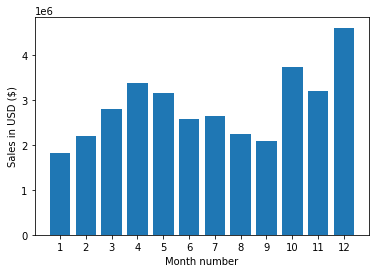

In [12]:
months = range(1,13)
plt.bar(months, sales_results['Sales'])
plt.xticks(months)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Month number")

plt.show()

## Question 2: What city had the highest number of sales?

#### Add a new "city" column

In [13]:
all_data["City"] = all_data['Purchase Address'].apply(
    lambda x: x.split(",")[1] + " " + x.split(",")[2][1:3]
)
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA


In [14]:
city_results = all_data.groupby(['City']).sum()
city_results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


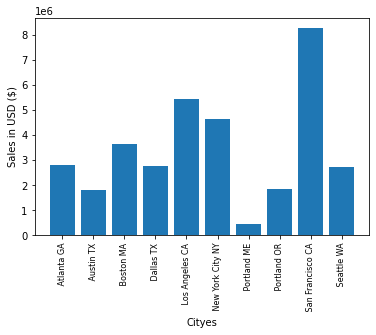

In [15]:
cityes = [city for city, df in all_data.groupby("City")]
plt.bar(cityes, city_results['Sales'])
plt.xticks(cityes, rotation="vertical", size=8)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Cityes")

plt.show()

## Question 3: What time should we display adv to maximize likelihood of customer's buying product?

In [16]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22


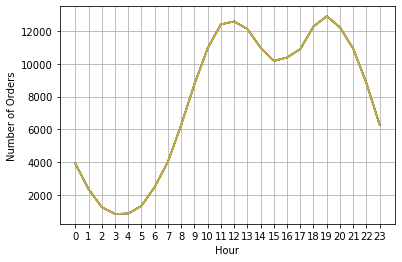

In [17]:
hours = [hour for hour, df in all_data.groupby("Hour")]

plt.plot(hours, all_data.groupby(["Hour"]).count())
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()

#  I would recommend paying attention to the interval between 11 am and 7 pm.

## Question 4: What products are most often sold together?

In [18]:
df = all_data[all_data["Order ID"].duplicated(keep=False)]
df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))
df = df[["Order ID", "Grouped"]].drop_duplicates()
df.head()

<ipython-input-18-941ea8de323e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [19]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## Qestion 5: What product sold the most? Why do you think it sold the most?

In [49]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22


In [77]:
product_group = all_data.groupby("Product")
product_group.sum()
quantity_ordered = product_group.sum()["Quantity Ordered"]
quantity_ordered_sort = quantity_ordered.sort_values(ascending=True)

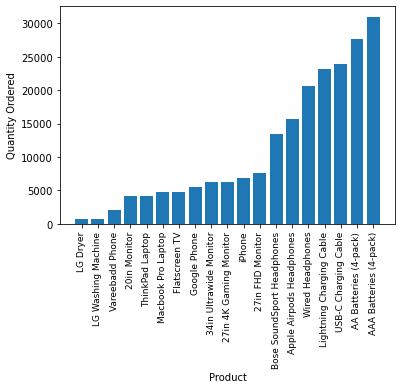

In [78]:
products = [product for product in quantity_ordered_sort.index]



plt.bar(products, quantity_ordered_sort)
plt.xticks(products, rotation="vertical", size=9)
plt.ylabel("Quantity Ordered")
plt.xlabel("Product")

plt.show()

<ipython-input-79-e3c6ed65c5ed>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation="vertical", size=8)


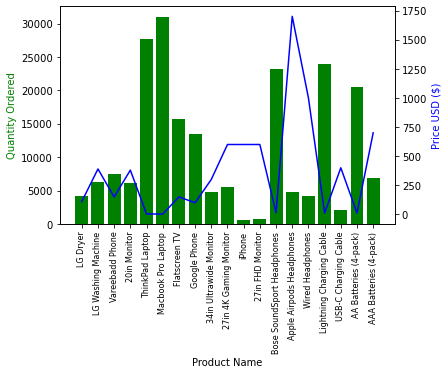

In [79]:
prices = all_data.groupby("Product").mean()["Price Each"]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color="g")
ax2.plot(products, prices, 'b-')

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered", color='g')
ax2.set_ylabel("Price USD ($)", color='b')
ax1.set_xticklabels(products, rotation="vertical", size=8)

plt.show()
